**CNN**

In [1]:
import time
start_time = time.time()

# Importing libraries
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [2]:
# Importing IMDb Datasets directly from keras datasets
from keras.datasets import imdb

In [3]:
max_num = 10000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_num)

17465344/17464789 [==============================] - 2s 0us/step


[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


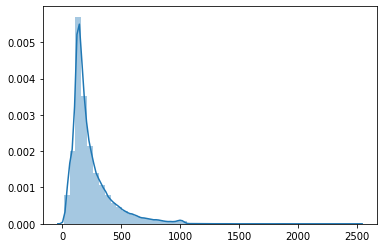

In [4]:
# Plotting no. of words for padding
import seaborn as sns

print(x_train)

word_length = [len(i) for i in x_train]
sns.distplot(word_length)

In [5]:
# Padding data
padding_num = 500;
x_train = sequence.pad_sequences(x_train, maxlen= padding_num)
x_test = pad_sequences(x_test, maxlen = padding_num)
print(x_train.shape)

(25000, 500)


In [6]:
# CNN network
word_size = 10000

model = Sequential()
model.add(Embedding(word_size, 32, input_length = padding_num))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 2,323,605
Trainable params: 2,323,605
Non-trainable params: 0
____________________________________________

In [7]:
# Fitting the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=20, batch_size=128, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 9s 379us/step - loss: 0.4527 - accuracy: 0.7544 - val_loss: 0.2723 - val_accuracy: 0.8868
Epoch 2/20
25000/25000 [==============================] - 3s 138us/step - loss: 0.1887 - accuracy: 0.9278 - val_loss: 0.2748 - val_accuracy: 0.8881
Epoch 3/20
25000/25000 [==============================] - 3s 135us/step - loss: 0.1087 - accuracy: 0.9623 - val_loss: 0.3114 - val_accuracy: 0.8813
Epoch 4/20
25000/25000 [==============================] - 3s 136us/step - loss: 0.0469 - accuracy: 0.9877 - val_loss: 0.4199 - val_accuracy: 0.8750
Epoch 5/20
25000/25000 [==============================] - 3s 136us/step - loss: 0.0168 - accuracy: 0.9970 - val_loss: 0.5076 - val_accuracy: 0.8743
Epoch 6/20
25000/25000 [==============================] - 3s 135us/step - loss: 0.0049 - accuracy: 0.9995 - val_loss: 0.5899 - val_accuracy: 0.8731
Epoch 7/20
25000/25000 [==============================] - 3s 1

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


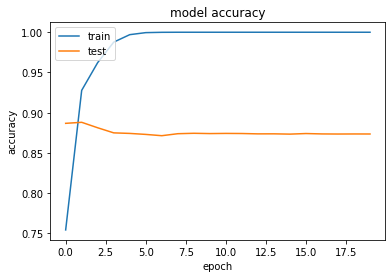

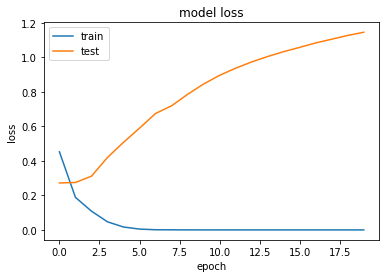

25000/25000 [==============================] - 2s 95us/step
Accuracy: 87.36%

Execution Time 97.25918936729431 seconds: 


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# List all data in history
print(history.history.keys())

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

scores = model.evaluate(x_test, y_test, verbose=1)

print("Accuracy: %.2f%%" % (scores[1]*100))
print(); print("Execution Time %s seconds: " % (time.time() - start_time))